# GRIP : THE SPARKS FOUNDATION
## DATA SCIENCE AND BUSINESS ANALYTICS INTERN
## By : Swapna Sambhav Nayak (OCT2022-BATCH)
### TASK-5 : Exploratory Data Analysis - Sports

### Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

### Suggest teams or players a company should endorse for its products.

In [57]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove unnecessary warning
import warnings as x
x.filterwarnings("ignore")

In [58]:
delivery_data = pd.read_csv("C:/Users/Dell/Desktop/GRIP Intern/Grip_Tasks/Task_05/Indian Premier League/deliveries.csv")
match_data = pd.read_csv("C:/Users/Dell/Desktop/GRIP Intern/Grip_Tasks/Task_05/Indian Premier League/matches.csv")


### [A] Data Contents & Information

In [59]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [60]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [61]:
# DETAILS ABOUT THE DATA ATTRIBUTES
li1 = [delivery_data,match_data]
for i in li1:
    print(" DATA DETAILS ", i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [62]:
# STATISTICAL SUMMARY
for i in li1:
    print(i.describe())

            match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [63]:
# CHECKING FOR MISSING VALUES
print('Match Data Missing Values Count:-> ', match_data.isna().sum())
print('Delivery Data Missing Values Count:-> ', delivery_data.isna().sum())


Match Data Missing Values Count:->  id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
Delivery Data Missing Values Count:->  match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismi

## [B] Data Analysis on Delivery Data

In [101]:

def label_func(x):
    for i in x:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
# for batsman
def calc_func(xp_data,second):
    xp_data = xp_data.iloc[:10,:]
    labelling = np.array(xp_data['batsman'])
    df = np.arange(len(labelling))
    fig, ax = plt.subplots(figsize=(15,9))
    barse = ax.bar(df, np.array(xp_data['batsman_runs']), width=0.9, color='salmon')
    ax.set_xticks(df+(0.9/2.))
    ax.set_xticklabels(labelling, rotation=90)
    ax.set_xlabel('BATSMAN')
    ax.set_ylabel('COUNT')
    if second=="maximal_run":
        ax.set_title('TOP IPL SCORERS')
    elif second=="maximal_four":
        ax.set_title('TOP IPL BOUNDARY SCORERS')
    elif second=="maximal_six":
        ax.set_title('TOP IPL SIXERS SCORERS')
    else:
        ax.set_title('TOP IPL DOT BALLS SCORERS')
    label_func(barse)
    plt.show()
    
# for bowlers
def calc_func2(xp_data,second):
    xp_data = xp_data.iloc[:10,:]
    labelling = np.array(xp_data['bowler'])
    df = np.arange(len(labelling))
    fig, ax = plt.subplots(figsize=(15,9))
    if second=="maximal_bowls":
        barse = ax.bar(df, np.array(xp_data['ball']), width=0.9, color='aquamarine')
        ax.set_title('MAXIMUM NUMBER OF BOWLS')
    elif second=="maximal_extras":
        barse = ax.bar(df, np.array(xp_data['extra_runs']), width=0.9, color='aquamarine')
        ax.set_title('TOP BOWLERS WITH EXTRAS')
    else:
        barse = ax.bar(df, np.array(xp_data['total_runs']), width=0.9, color='aquamarine')
        ax.set_title('MAXIMUM DOT BALLS BOWLED')
    ax.set_xticks(df+(0.9/2.))
    ax.set_xticklabels(labelling, rotation=90)
    ax.set_xlabel('BOWLERS')
    ax.set_ylabel('COUNT')
    
    label_func(barse)
    plt.show()

### Batsman Data Exploration

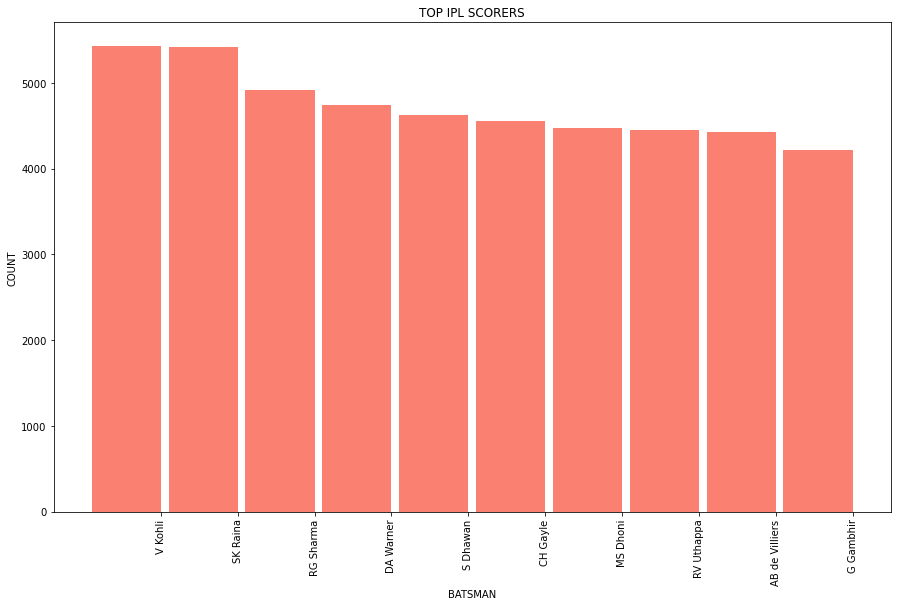

In [91]:
# Lets find out players with maximum runs in IPL
xp_data = delivery_data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
calc_func(xp_data,"maximal_run")

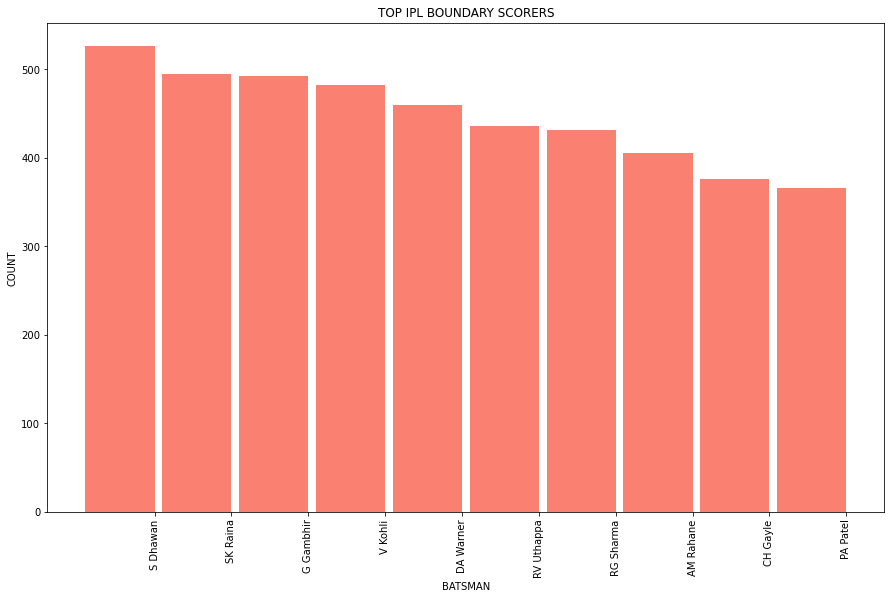

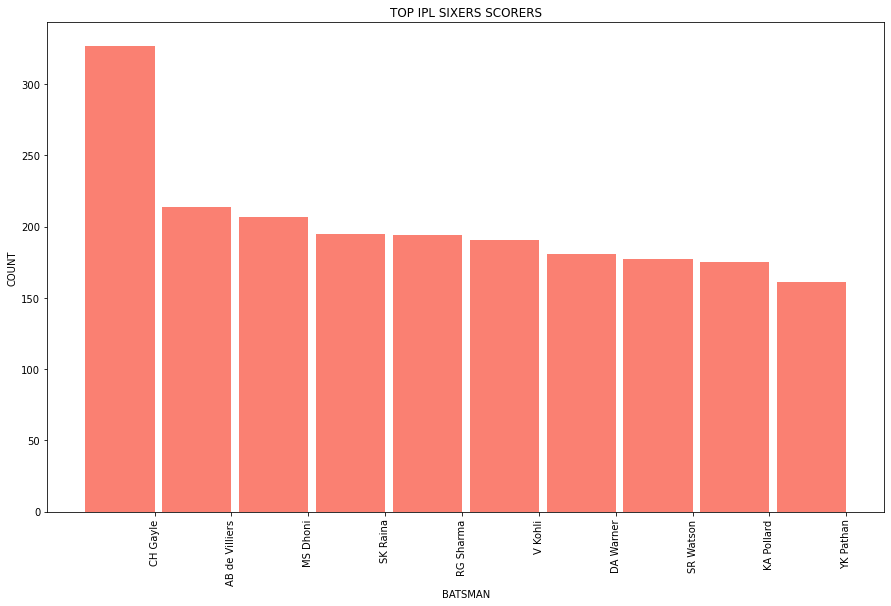

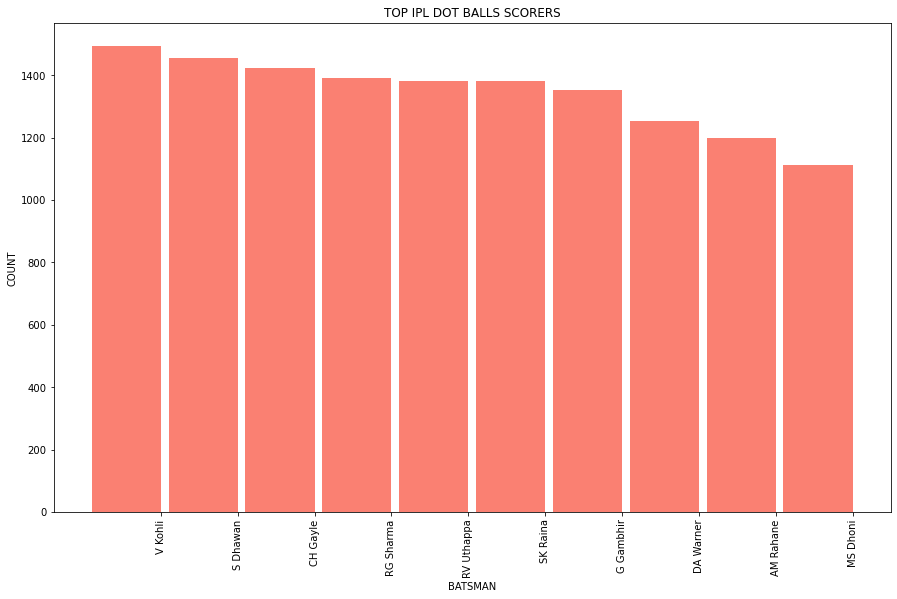

In [93]:
# lETS FIND OUT PLAYERS WITH MORE 4'S IN IPL
fours = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
calc_func(fours,"maximal_four")
# S DHAWAN

# lETS FIND OUT PLAYERS WITH MORE 6'S IN IPL
sixes = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
calc_func(sixes,"maximal_six")
# CH GAYLE

# LETS FIND OUT PLAYERS WITH MAXIMUM DOT BALLS 
no_run = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
calc_func(no_run,"maximal_dot")
# VIRAT KOHLI

### Bowlers Data Exploration

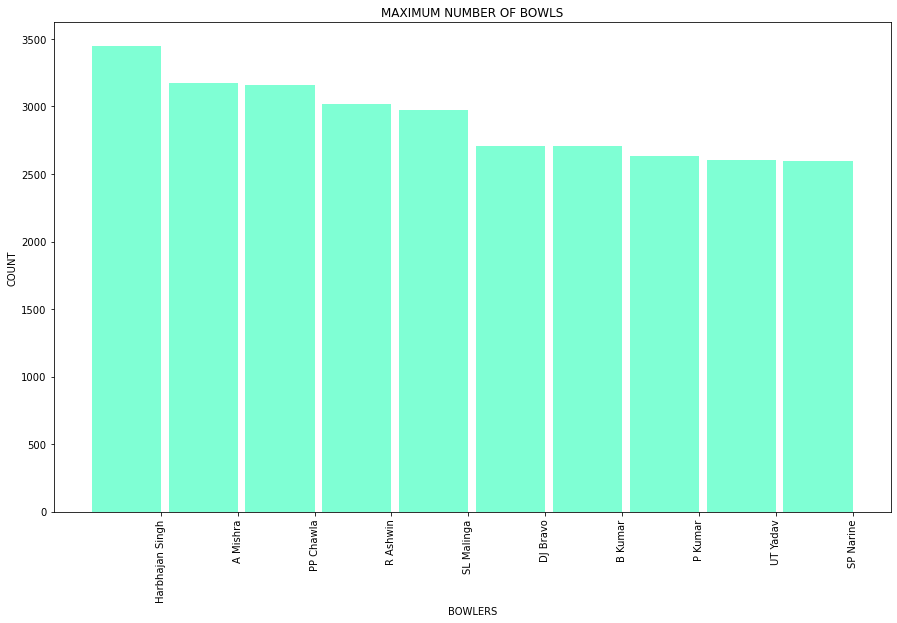

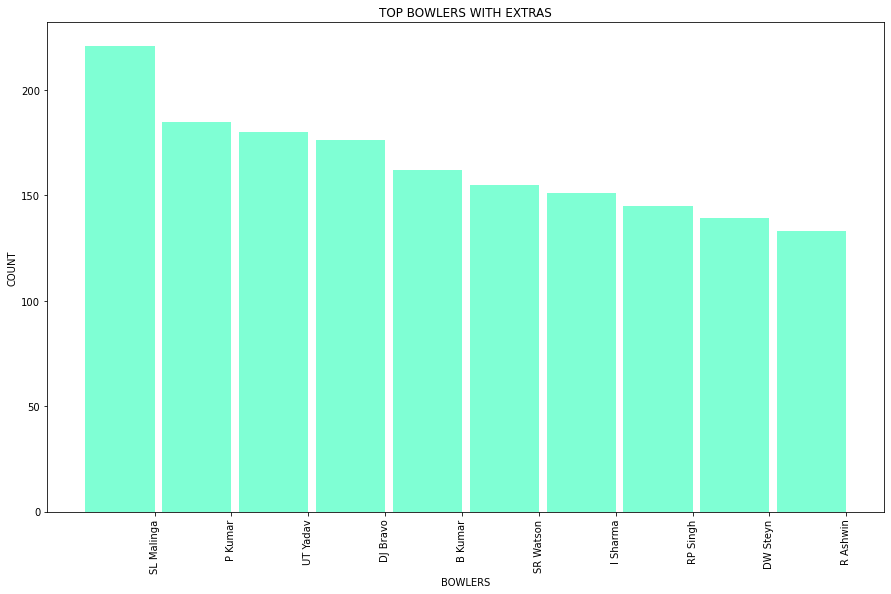

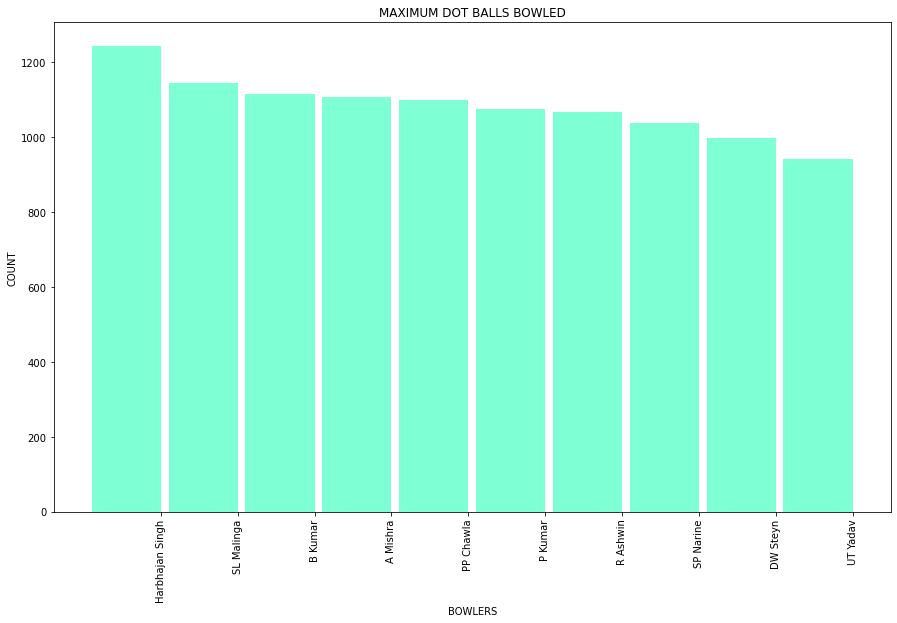

In [102]:
# LET'S FIND BOWLERS WITH MAXIMUM BOWLS
maxBowl = delivery_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
calc_func2(maxBowl,'maximal_bowls')

# LET'S FIND BOWLERS WITH MORE EXTRAS
maxExtras = delivery_data.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
calc_func2(maxExtras,'maximal_extras')

# LET'S FIND BOWLERS WITH MAXIMUM DOT BALLS
maxDotBowl = delivery_data.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
calc_func2(maxDotBowl,'maximal_dot_balls')

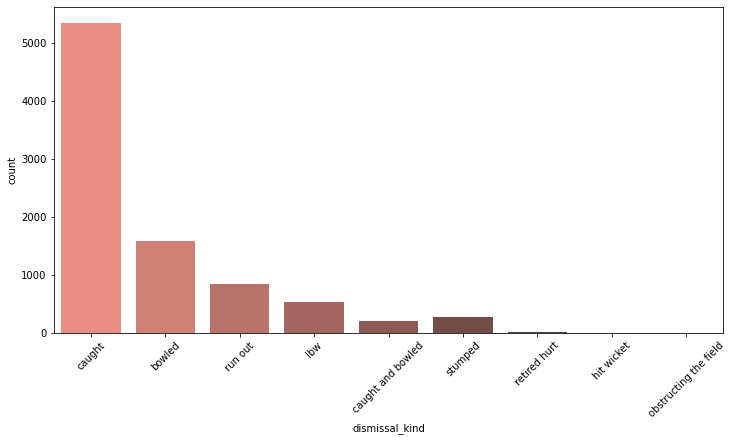

In [112]:
# FINALLY LET'S SEE NUMBER OF DISMISSAL TYPES BY BOWLERS
plt.figure(figsize=(12,6))
ax.set_ylabel("COUNT")
ax.set_xlabel("DISMISSAL TYPE")
sns.countplot(x='dismissal_kind', data=delivery_data,palette='dark:salmon_r')
plt.xticks(rotation=45)
plt.show()

## [C] Data Analysis on Match Data

In [65]:
# TOTAL MATCH & DISTINCT SEASON COUNT PRESENT IN THE MATCH DATA
print('Total Matches-> ',match_data['id'].max())
print('Unique Seasons-> ',match_data['season'].unique())

Total Matches->  11415
Unique Seasons->  [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


In [66]:
# LET'S FIND THE WINNING TEAMS
def calcMaxMin(colName):
    maximal = match_data.iloc[match_data[colName].idxmax()]['winner']
    if colName == 'win_by_wickets':
        print('Maximum Wickets:-> ', maximal)
        minimal = match_data.iloc[match_data[match_data[colName].ge(1)].win_by_wickets.idxmin()]['winner']
        print('Minimum Wickets:-> ', minimal)
    if colName == 'win_by_runs':
        print('Maximum Runs:-> ', maximal)    
        minimal = match_data.iloc[match_data[match_data[colName].ge(1)].win_by_runs.idxmin()]['winner']
        print('Minimum Runs:-> ', minimal)
# BY MAXIMUM AND MINIMUM RUNS
calcMaxMin('win_by_runs')
# BY MAXIMUM AND MINIMUM WICKETS
calcMaxMin('win_by_wickets')

Maximum Runs:->  Mumbai Indians
Minimum Runs:->  Mumbai Indians
Maximum Wickets:->  Kolkata Knight Riders
Minimum Wickets:->  Kolkata Knight Riders


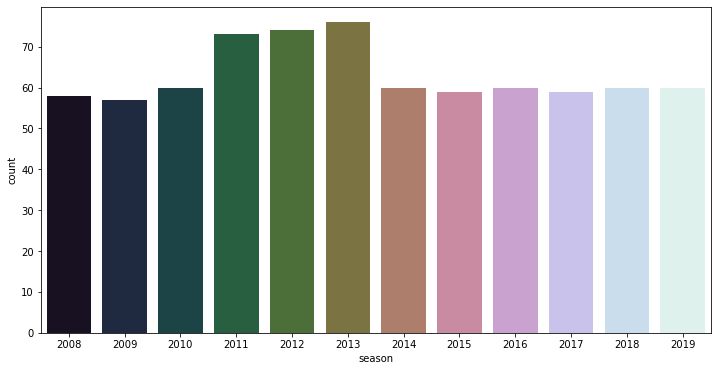

In [67]:
# NOW LET'S CHECK FOR YEAR HAVING MAXIMUM MATCHES
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=match_data,palette='cubehelix')
plt.show()
# 2013 had most matches 

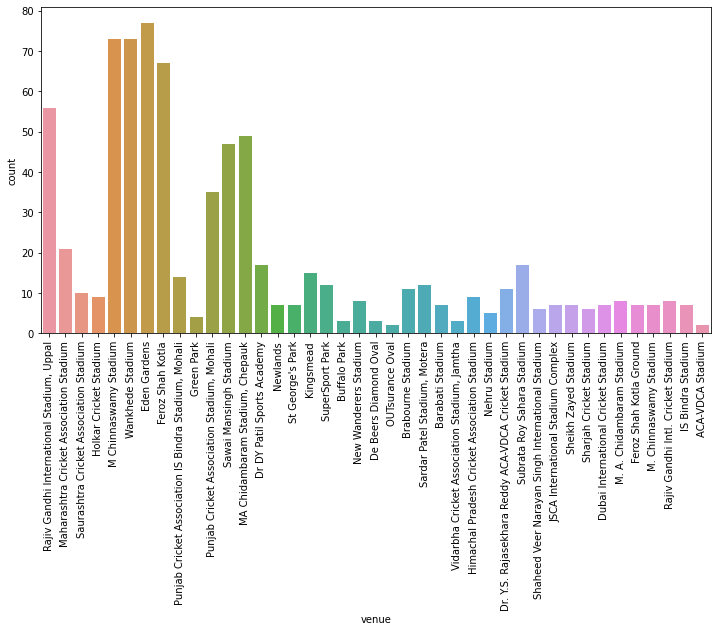

In [68]:
# NOW LET'S FIND OUT VENUE HAVING MOST MATCHES
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=match_data)
plt.xticks(rotation=90)
plt.show()
# EDEN GARDENS

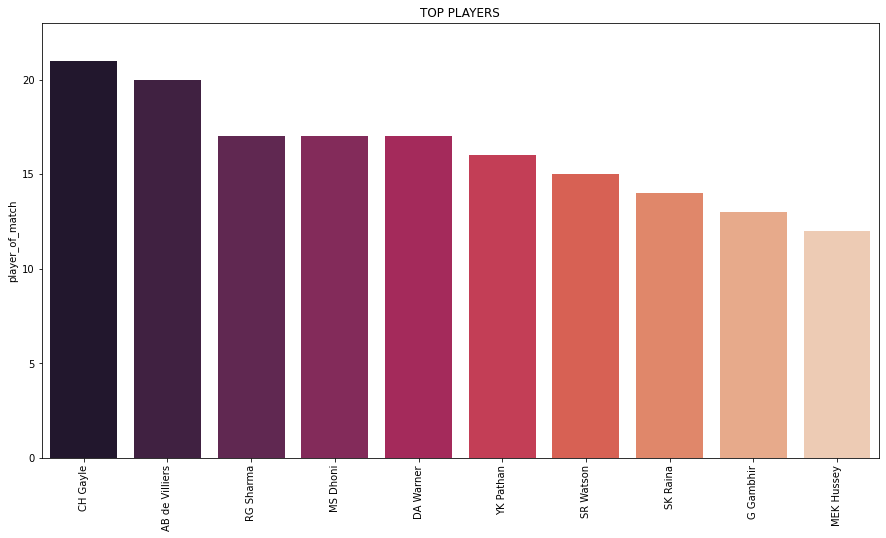

In [69]:
# NOW LET'S FIND PLAYER OF MATCH WINS
toppers = match_data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,23])
ax.set_ylabel("COUNT VALUES")
ax.set_title("TOP PLAYERS")
toppers.plot.bar()
sns.barplot(x = toppers.index, y = toppers, palette="rocket")
plt.show()
# CH Gayle

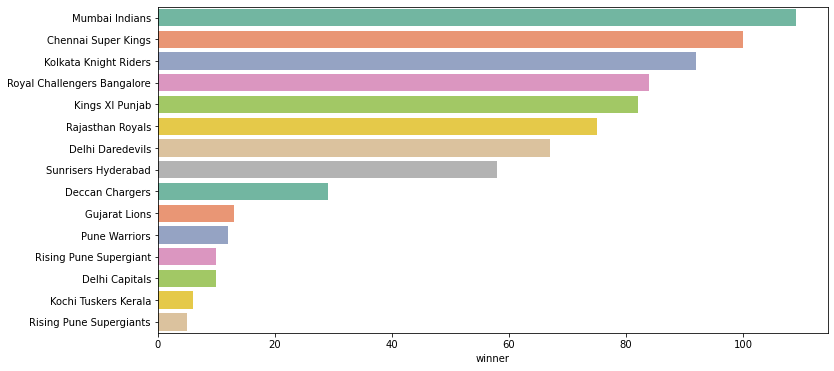

In [70]:
# NOW LET'S FIND TEAM WITH MAXIMUM WINS
plt.figure(figsize=(12,6))
data_141 = match_data.winner.value_counts()
sns.barplot(y = data_141.index, x = data_141,palette='Set2')
plt.show()
# MUMBAI INDIANS

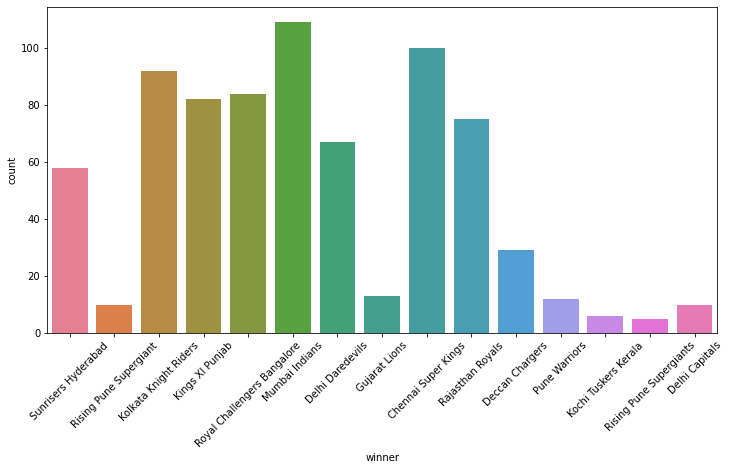

In [71]:
# LET'S CALCULATE NUMBER OF WINS OF EACH TEAM
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=match_data, palette='husl')
plt.xticks(rotation=45)
plt.show()
# MUMBAI INDIANS

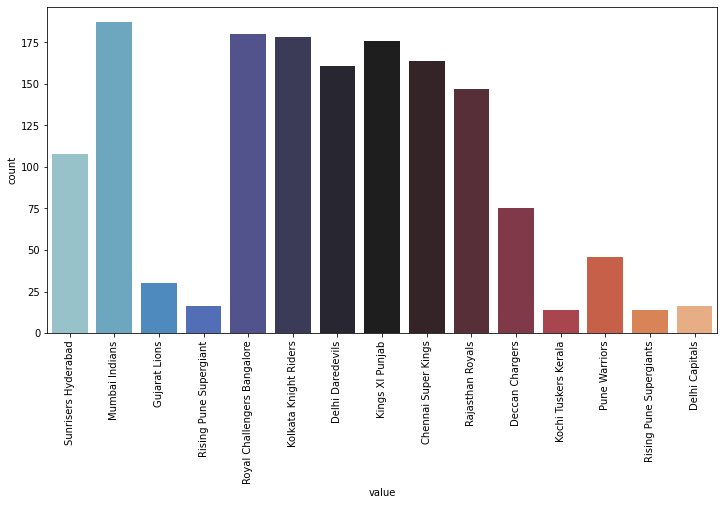

In [72]:
# MATCH COUNT OF ALL THE TEAMS
teams_data = pd.melt(match_data, id_vars=['id','season'], 
                     value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=teams_data,palette='icefire')
plt.xticks(rotation='vertical')
plt.show()
# MUMBAI INDIANS MOST AND DELHI CAPITALS LESS

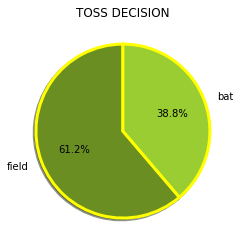

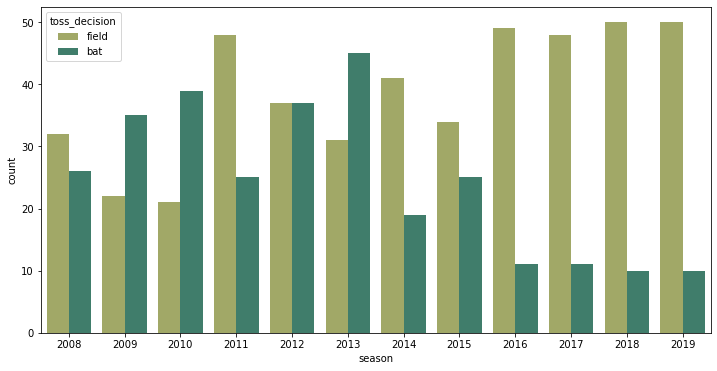

In [73]:
# LET'S SEE TOSS DECISIONS MADE MY TEAMS SO FAR
toss_data = match_data.toss_decision.value_counts()
labelling = (np.array(toss_data.index))
size=(np.array((toss_data/toss_data.sum())*100))
plt.title('TOSS DECISION')
coloring=['olivedrab','yellowgreen']
plt.pie(size,labels=labelling,labeldistance=1.15,wedgeprops={'linewidth':3,
        'edgecolor':'yellow'},
        autopct='%1.1f%%',
        shadow=True,colors=coloring, startangle=90)

plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=match_data,palette='gist_earth_r')
plt.xticks(rotation='horizontal')
plt.show()


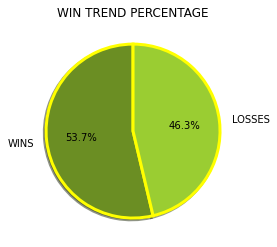

In [74]:
# WIN TREND OF TEAM FIELDING FIRST
wins_ctr = (match_data.win_by_wickets>0).sum()
loss_ctr = (match_data.win_by_wickets==0).sum()
labelling = ["WINS", "LOSSES"]
size = [(wins_ctr/(wins_ctr + loss_ctr))*100, (loss_ctr/(wins_ctr + loss_ctr))*100]
coloring = ['olivedrab','yellowgreen']
plt.pie(size,labels=labelling,labeldistance=1.15,wedgeprops={'linewidth':3,
        'edgecolor':'yellow'},
        autopct='%1.1f%%',
        shadow=True,colors=coloring, startangle=90)
plt.title("WIN TREND PERCENTAGE")
plt.show()

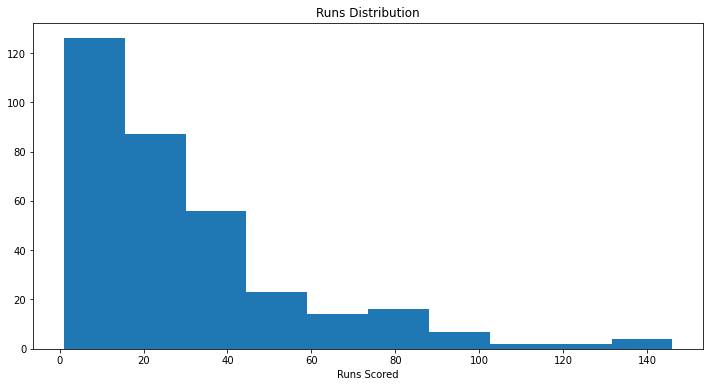

In [106]:
# WIN TREND OF TEAM BATTING FIRST
bat_1st = match_data[match_data['win_by_runs']!=0]
plt.figure(figsize=(12,6))
plt.hist(bat_1st['win_by_runs'])
plt.title('Runs Distribution')
plt.xlabel("Runs Scored")
plt.show()

<BarContainer object of 5 artists>

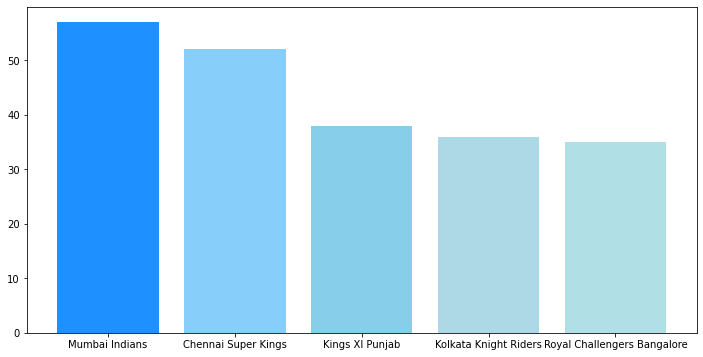

In [107]:
# TOP 5 TEAMS BATTING FIRST AND WINNING THE MATCH HISTORY
plt.figure(figsize=(12,6))
plt.bar(list(bat_1st['winner'].value_counts()[:5].keys()),list(bat_1st['winner'].value_counts()[:5]),
        color=['dodgerblue','lightskyblue','skyblue','lightblue','powderblue'])

([<matplotlib.patches.Wedge at 0x173ee9fe310>,
 [Text(0.9483265621806172, 0.5573838277728304, 'Mumbai Indians'),
  Text(0.02563386044208945, 1.0997012799841763, 'Chennai Super Kings'),
  Text(-0.8010226010255528, 0.7538983967659425, 'Kings XI Punjab'),
  Text(-1.0976587644223588, 0.07173030661290015, 'Kolkata Knight Riders'),
  Text(-0.9099615286095598, -0.6180372290166294, 'Royal Challengers Bangalore'),
  Text(-0.3959592959126898, -1.0262632391254825, 'Sunrisers Hyderabad'),
  Text(0.1786580387418249, -1.08539453895481, 'Rajasthan Royals'),
  Text(0.6638604303770628, -0.8770914028649359, 'Delhi Daredevils'),
  Text(0.9534813337914305, -0.5485192303933517, 'Deccan Chargers'),
  Text(1.0514175368316108, -0.32329732947079654, 'Pune Warriors'),
  Text(1.0789886618399935, -0.21397071673651988, 'Rising Pune Supergiant'),
  Text(1.0919321532371848, -0.1329818511181329, 'Delhi Capitals'),
  Text(1.0969423967462106, -0.08195961335120551, 'Kochi Tuskers Kerala'),
  Text(1.099235333706967, -0.0

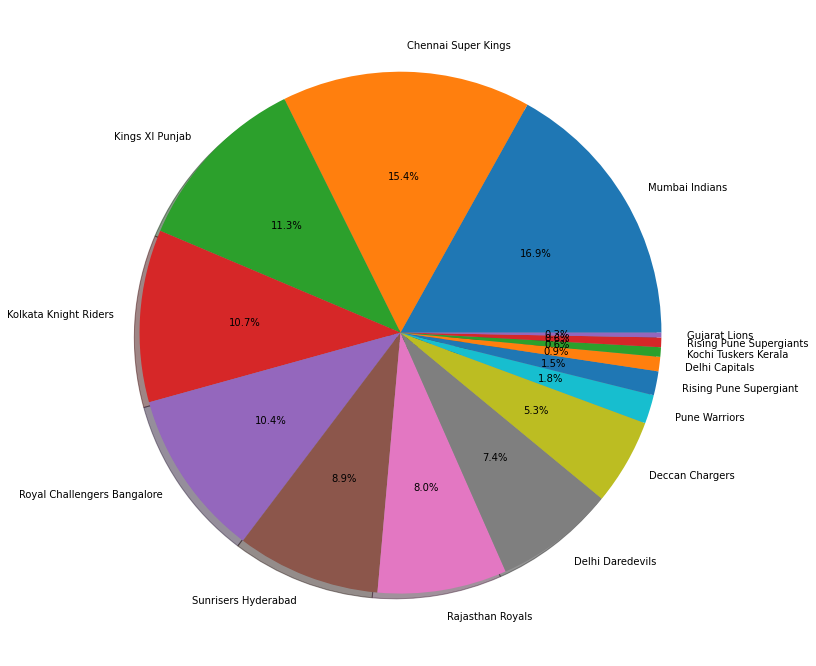

In [110]:
plt.figure(figsize=(12,12))
plt.pie(list(bat_1st['winner'].value_counts()),labels=list(bat_1st['winner'].value_counts().keys()),
       
        autopct='%0.1f%%',
        shadow=True)

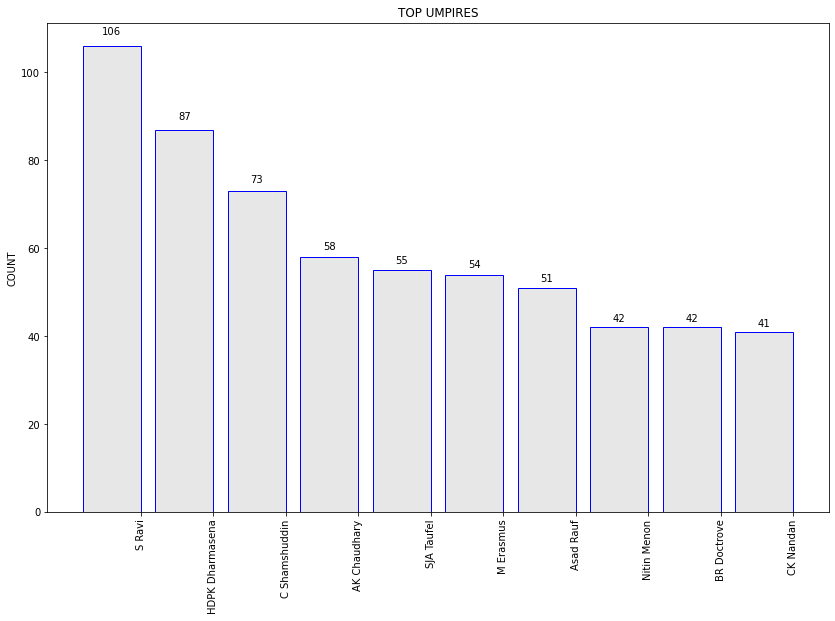

In [75]:
# LETS CHECK TOP UMPIRES THROUGHOUT SEASONS
def label_func(x):
    for i in x:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
umpire_data = pd.melt(match_data, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
umpiring = umpire_data.value.value_counts()[:10]
labelling = np.array(umpiring.index)
df = np.arange(len(labelling))
fig, ax = plt.subplots(figsize=(14,9))
barse = ax.bar(df, np.array(umpiring), width=0.8,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
ax.set_xticks(df+((0.8)/2.))
ax.set_xticklabels(labelling, rotation='vertical')
ax.set_ylabel("COUNT")
ax.set_title("TOP UMPIRES")
label_func(barse)
plt.show()
# S RAVI

## [D] Results

####                                                                 BATSMAN RESULT OVERVIEW
* **Virat Kohli** has the highest runs in IPL with **maximum number of dot balls** played.
* **Shikhar Dhawan** has the highest **boundary runs** in IPL.
* **CH Gayle** has the highest number of **Sixes** in IPL.

####                                                                 BOWLERS RESULT OVERVIEW
* **Harbhajan Singh** has **maximum bowls** as well as **maximum dot balls bowled** in IPL.
* **SL Malinga** is a top bowler with **most extras** in IPL.
* **Caught** is the most common type of dismissal observed in IPL.

####                                                                 MATCH DATA RESULT OVERVIEW
* **Mumbai Indians** is the winning team with **maximum and minimum runs** in IPL Season.
* **Kolkata Knight Riders** is the winning team with **maximum and minimum wickets** in IPL Season.
* **2013** is the year of most number of matches observed with **Eden Gardens** hosting maximum number of matches.
* **CH Gayle** is the best palyer of most match wins.
* **MI** played maximum number of matches whereas **Delhi Capitals** played less.
* **Above 50% -> (61.2%)** of the times toss winner decided to play **fielding first** than **batting**.
* Analysing **Winning Trend** of the teams choosing fielding first is **53.7% winning percentile**. That implies, 
  there is a correlation between fielding factor and winning chance according to the provided data.
* Analysing **Winning Trend** of the teams choosing batting first,
  **Mumbai Indians** has the **highest win rate**.
* **S Ravi** is the top Umpire throughout IPL season.